In [1]:
import pandas as pd
import simpledbf
import matplotlib.pyplot as plt

In [2]:
# Importar archivo de INEGI
dbf = simpledbf.Dbf5("Datos/enpecyt2017_bd_dbf/enpecyt2017_cb1.dbf", codec = "cp1252")

In [3]:
# Convertir a dataframe
df = dbf.to_dataframe()

In [4]:
df[:5]

,CD_A,PER,ENT,CON,V_SEL,N_HOG,N_REN,S3P1,S3P1_2,S3P2,...,S4P17_6,S4P17_7,S4P17_8,S4P17_9,S4P17_10,S4P17_11,S4P17_12,S4P17_13,S4P17_14,FAC
0,14,1117,01,40018,3,1,01,3,3,NaN,...,2,3,3,2,2,2,2,1,2,5072
1,14,1117,01,40018,4,1,01,2,6,NaN,...,3,3,3,3,3,3,2,3,3,5072
2,14,1117,01,40018,2,1,01,2,6,NaN,...,3,3,3,3,3,3,2,3,3,7608
3,14,1117,01,40018,1,1,03,4,3,NaN,...,2,2,3,3,3,2,2,3,3,10144
4,14,1117,01,40018,5,1,02,3,3,NaN,...,3,3,3,3,3,3,1,3,3,5072


In [5]:
# Columnas de df
df.keys()

Index(['CD_A', 'PER', 'ENT', 'CON', 'V_SEL', 'N_HOG', 'N_REN', 'S3P1',
       'S3P1_2', 'S3P2',
       ...
       'S4P17_6', 'S4P17_7', 'S4P17_8', 'S4P17_9', 'S4P17_10', 'S4P17_11',
       'S4P17_12', 'S4P17_13', 'S4P17_14', 'FAC'],
      dtype='object', length=236)

In [6]:
# Tomando en cuenta el formulario de INEGI..
# Variables que nos interesan
prelista = pd.Series(df.keys()[199:214])

In [7]:
lista = list(prelista)

In [8]:
lista.append("FAC")

In [9]:
lista

['S4P15_1',
 'S4P15_2',
 'S4P15_3',
 'S4P15_4',
 'S4P15_5',
 'S4P15_6',
 'S4P15_7',
 'S4P15_8',
 'S4P15_9',
 'S4P15_10',
 'S4P15_11',
 'S4P15_12',
 'S4P15_13',
 'S4P15_14',
 'S4P15_15',
 'FAC']

In [10]:
# Obtener DF con las variables que nos interesan
nbase = df.loc[:, lista]

In [11]:
nbase.head()

,S4P15_1,S4P15_2,S4P15_3,S4P15_4,S4P15_5,S4P15_6,S4P15_7,S4P15_8,S4P15_9,S4P15_10,S4P15_11,S4P15_12,S4P15_13,S4P15_14,S4P15_15,FAC
0,4,3,4,2,2,4,2,4,4,4,4,4,3,3,2,5072
1,2,2,4,4,2,5,4,2,2,5,4,2,2,5,2,5072
2,2,2,4,2,1,1,2,3,4,4,4,1,2,1,2,7608
3,4,4,4,2,2,2,4,2,4,4,4,2,2,2,2,10144
4,3,3,4,3,2,1,2,3,1,3,3,2,2,2,3,5072


In [12]:
grupos = nbase.groupby("S4P15_1")

In [13]:
porcentajes = (grupos["FAC"].sum()/nbase["FAC"].sum())*100
porcentajes

S4P15_1
1     3.857005
2    43.091304
3    44.459612
4     6.644701
5     1.947378
Name: FAC, dtype: float64

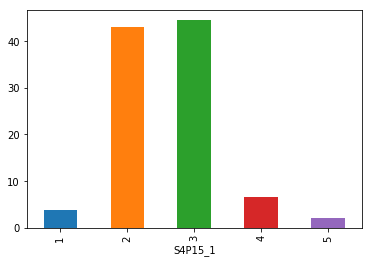

In [14]:
porcentajes.plot(kind = "bar")

In [15]:
opciones = ["Muy confiable", "Confiable", "Poco confiable", "Nada confiable", "Nos sape"]

In [16]:
# No funciona por no ser un DF (es Serie.. no tiene índice)
porcentajes.set_index(opciones)

AttributeError: 'Series' object has no attribute 'set_index'

In [17]:
npor = porcentajes.to_frame()
npor

,FAC
S4P15_1,
1,3.857005
2,43.091304
3,44.459612
4,6.644701
5,1.947378


In [18]:
# Tampoco funciona porque opciones es una lista y debe ser Serie para funcionar como índice
npor.set_index(opciones)

KeyError: 'Muy confiable'

In [19]:
porcentaje2 = npor.set_index(pd.Series(opciones))
porcentaje2

,FAC
Muy confiable,3.857005
Confiable,43.091304
Poco confiable,44.459612
Nada confiable,6.644701
Nos sape,1.947378


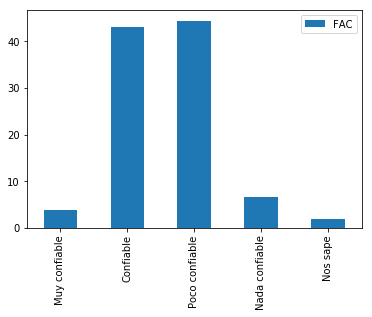

In [20]:
porcentaje2.plot(kind = "bar")

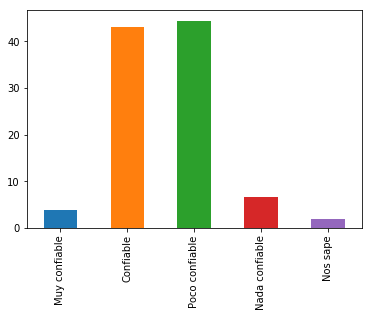

In [21]:
# Cambia los colores por especificar que solo se trata de una columna
porcentaje2["FAC"].plot(kind = "bar")

In [22]:
# Realizar gráfica para varios grupos
g1 = nbase.groupby("S4P15_5")
g2 = nbase.groupby("S4P15_6")
g3 = nbase.groupby("S4P15_10")
g4 = nbase.groupby("S4P15_12")

In [23]:
p1 = g1["FAC"].sum()/nbase["FAC"].sum()*100
p2 = g2["FAC"].sum()/nbase["FAC"].sum()*100
p3 = g3["FAC"].sum()/nbase["FAC"].sum()*100
p4 = g4["FAC"].sum()/nbase["FAC"].sum()*100

In [24]:
forma1 = pd.DataFrame([p1,p2,p3,p4])
forma1

,1,2,3,4,5
FAC,29.570499,54.027473,11.228825,1.613482,3.559721
FAC,28.365080,55.990246,10.455184,1.554636,3.634855
FAC,4.728196,27.904767,45.637429,19.120880,2.608727
FAC,23.567627,63.160841,10.932853,1.747550,0.591129


In [25]:
p1.name = "p1"
p2.name = "p2"
p3.name = "p3"
p4.name = "p4"

In [26]:
forma1 = pd.DataFrame([p1,p2,p3,p4])
forma1

,1,2,3,4,5
p1,29.570499,54.027473,11.228825,1.613482,3.559721
p2,28.365080,55.990246,10.455184,1.554636,3.634855
p3,4.728196,27.904767,45.637429,19.120880,2.608727
p4,23.567627,63.160841,10.932853,1.747550,0.591129


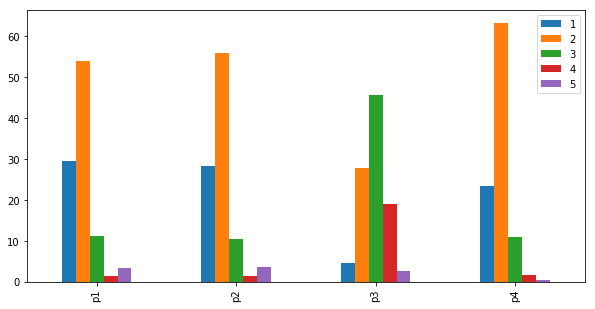

In [27]:
forma1.plot(kind = "bar", figsize = (10,5))

In [28]:
forma2 = forma1.transpose()
forma2

,p1,p2,p3,p4
1,29.570499,28.365080,4.728196,23.567627
2,54.027473,55.990246,27.904767,63.160841
3,11.228825,10.455184,45.637429,10.932853
4,1.613482,1.554636,19.120880,1.747550
5,3.559721,3.634855,2.608727,0.591129


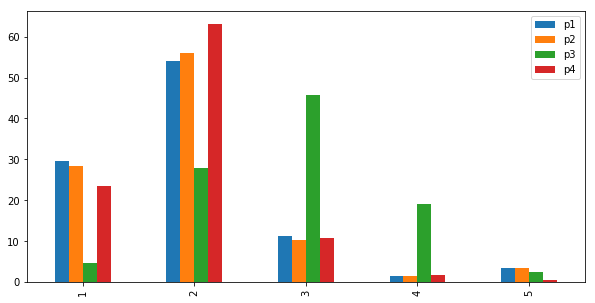

In [29]:
forma2.plot(kind = "bar", figsize = (10,5))

In [30]:
# Ciclos
# Con el siguiente código se imprimen los nombres de columnas
for col in nbase:
    print(col)

S4P15_1
S4P15_2
S4P15_3
S4P15_4
S4P15_5
S4P15_6
S4P15_7
S4P15_8
S4P15_9
S4P15_10
S4P15_11
S4P15_12
S4P15_13
S4P15_14
S4P15_15
FAC


In [32]:
# Generar lista vacía
resultados = []
for col in nbase:
    temp0 = nbase.groupby(col)
    temp1 = temp0["FAC"].sum()/nbase["FAC"].sum()*100
    temp1.name = col
    resultados.append(temp1)

In [33]:
# Pop() regresa último elemento de la lista pero la elimina de la tabla original
resultados.pop()

FAC
629       0.001697
637       0.001719
687       0.001854
703       0.001897
720       0.001943
728       0.001964
740       0.003994
742       0.002002
746       0.002013
750       0.002024
760       0.002051
779       0.004204
781       0.006323
786       0.006363
787       0.002124
794       0.002143
795       0.004291
804       0.002170
805       0.004345
833       0.002248
839       0.002264
843       0.004550
859       0.004636
861       0.002323
892       0.004814
893       0.004819
897       0.004841
915       0.004938
926       0.007496
929       0.005014
            ...   
144050    0.388716
145458    0.785032
147328    1.192686
154770    0.417644
158238    0.427002
159462    0.430305
160068    0.431941
165200    0.891578
173166    0.934571
178840    0.482596
180022    1.457358
182474    1.477208
186198    0.502452
187494    2.023797
188284    0.508081
193944    1.046709
203226    1.096803
206949    0.558448
212616    1.721221
216075    0.583074
230888    1.246094
268260  

In [34]:
resultados

[S4P15_1
 1     3.857005
 2    43.091304
 3    44.459612
 4     6.644701
 5     1.947378
 Name: S4P15_1, dtype: float64, S4P15_2
 1     3.683050
 2    35.910623
 3    48.847864
 4    10.341632
 5     1.216832
 Name: S4P15_2, dtype: float64, S4P15_3
 1     0.358156
 2     5.200487
 3    31.333550
 4    61.973061
 5     1.134747
 Name: S4P15_3, dtype: float64, S4P15_4
 1     5.655421
 2    50.281120
 3    26.882024
 4    12.543401
 5     4.638034
 Name: S4P15_4, dtype: float64, S4P15_5
 1    29.570499
 2    54.027473
 3    11.228825
 4     1.613482
 5     3.559721
 Name: S4P15_5, dtype: float64, S4P15_6
 1    28.365080
 2    55.990246
 3    10.455184
 4     1.554636
 5     3.634855
 Name: S4P15_6, dtype: float64, S4P15_7
 1    20.758132
 2    59.277523
 3    14.551017
 4     1.905695
 5     3.507632
 Name: S4P15_7, dtype: float64, S4P15_8
 1     3.878444
 2    37.769491
 3    46.789535
 4     8.198916
 5     3.363614
 Name: S4P15_8, dtype: float64, S4P15_9
 1     5.905738
 2    37.986386

In [35]:
forma1 = pd.DataFrame(resultados)
forma1

S4P15_15,1,2,3,4,5
S4P15_1,3.857005,43.091304,44.459612,6.644701,1.947378
S4P15_2,3.683050,35.910623,48.847864,10.341632,1.216832
S4P15_3,0.358156,5.200487,31.333550,61.973061,1.134747
S4P15_4,5.655421,50.281120,26.882024,12.543401,4.638034
S4P15_5,29.570499,54.027473,11.228825,1.613482,3.559721
S4P15_6,28.365080,55.990246,10.455184,1.554636,3.634855
S4P15_7,20.758132,59.277523,14.551017,1.905695,3.507632
S4P15_8,3.878444,37.769491,46.789535,8.198916,3.363614
S4P15_9,5.905738,37.986386,45.792268,8.508288,1.807319
S4P15_10,4.728196,27.904767,45.637429,19.120880,2.608727


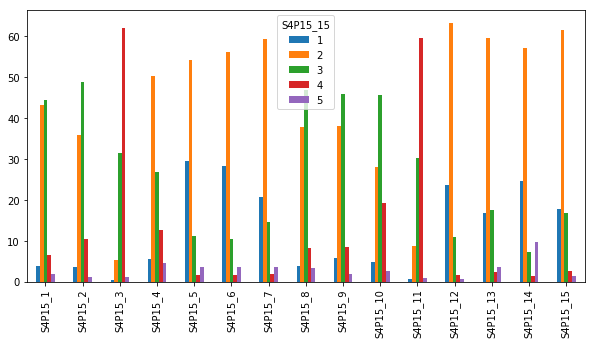

In [36]:
forma1.plot(kind = "bar", figsize = (10,5))

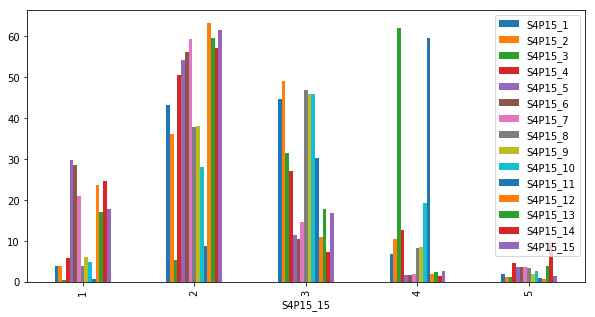

In [37]:
forma2 = forma1.transpose()
forma2.plot(kind = "bar", figsize = (10,5))

In [38]:
# Funciones
def fun1(numero):
    return numero*2

In [39]:
fun1("Hola")

'HolaHola'

In [40]:
# Crear función con el ciclo anterior
resultados = []
for col in nbase:
    temp0 = nbase.groupby(col)
    temp1 = temp0["FAC"].sum()/nbase["FAC"].sum()*100
    temp1.name = col
    resultados.append(temp1)

In [41]:
def porcentajes(col):
    temp0 = nbase.groupby(col)
    temp1 = temp0["FAC"].sum()/nbase["FAC"].sum()*100
    temp1.name = col
    return temp1
    

In [42]:
porcentajes("S4P15_6")

S4P15_6
1    28.365080
2    55.990246
3    10.455184
4     1.554636
5     3.634855
Name: S4P15_6, dtype: float64

In [43]:
resultados = []
for col in nbase:
    temp = porcentajes(col)
    resultados.append(temp1)

In [44]:
resultados

[FAC
 629       0.001697
 637       0.001719
 687       0.001854
 703       0.001897
 720       0.001943
 728       0.001964
 740       0.003994
 742       0.002002
 746       0.002013
 750       0.002024
 760       0.002051
 779       0.004204
 781       0.006323
 786       0.006363
 787       0.002124
 794       0.002143
 795       0.004291
 804       0.002170
 805       0.004345
 833       0.002248
 839       0.002264
 843       0.004550
 859       0.004636
 861       0.002323
 892       0.004814
 893       0.004819
 897       0.004841
 915       0.004938
 926       0.007496
 929       0.005014
             ...   
 144050    0.388716
 145458    0.785032
 147328    1.192686
 154770    0.417644
 158238    0.427002
 159462    0.430305
 160068    0.431941
 165200    0.891578
 173166    0.934571
 178840    0.482596
 180022    1.457358
 182474    1.477208
 186198    0.502452
 187494    2.023797
 188284    0.508081
 193944    1.046709
 203226    1.096803
 206949    0.558448
 212616    1.72

In [45]:
# Otra forma.. con apply
nbase.apply(sum)

S4P15_1         7772
S4P15_2         7676
S4P15_3        10156
S4P15_4         7500
S4P15_5         5897
S4P15_6         5900
S4P15_7         6450
S4P15_8         7648
S4P15_9         7099
S4P15_10        7985
S4P15_11        9754
S4P15_12        5725
S4P15_13        6393
S4P15_14        6636
S4P15_15        6203
FAC         37057876
dtype: int64

In [46]:
nbase.apply(lambda x: x.sum()) #Lo mismo que el anterior
nbase.apply(lambda x: x[:5])

,S4P15_1,S4P15_2,S4P15_3,S4P15_4,S4P15_5,S4P15_6,S4P15_7,S4P15_8,S4P15_9,S4P15_10,S4P15_11,S4P15_12,S4P15_13,S4P15_14,S4P15_15,FAC
0,4,3,4,2,2,4,2,4,4,4,4,4,3,3,2,5072
1,2,2,4,4,2,5,4,2,2,5,4,2,2,5,2,5072
2,2,2,4,2,1,1,2,3,4,4,4,1,2,1,2,7608
3,4,4,4,2,2,2,4,2,4,4,4,2,2,2,2,10144
4,3,3,4,3,2,1,2,3,1,3,3,2,2,2,3,5072


In [47]:
nbase.apply(lambda x: print(type(x)))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


S4P15_1     None
S4P15_2     None
S4P15_3     None
S4P15_4     None
S4P15_5     None
S4P15_6     None
S4P15_7     None
S4P15_8     None
S4P15_9     None
S4P15_10    None
S4P15_11    None
S4P15_12    None
S4P15_13    None
S4P15_14    None
S4P15_15    None
FAC         None
dtype: object

In [48]:
nbase.apply(lambda x: type(x))

S4P15_1     <class 'pandas.core.series.Series'>
S4P15_2     <class 'pandas.core.series.Series'>
S4P15_3     <class 'pandas.core.series.Series'>
S4P15_4     <class 'pandas.core.series.Series'>
S4P15_5     <class 'pandas.core.series.Series'>
S4P15_6     <class 'pandas.core.series.Series'>
S4P15_7     <class 'pandas.core.series.Series'>
S4P15_8     <class 'pandas.core.series.Series'>
S4P15_9     <class 'pandas.core.series.Series'>
S4P15_10    <class 'pandas.core.series.Series'>
S4P15_11    <class 'pandas.core.series.Series'>
S4P15_12    <class 'pandas.core.series.Series'>
S4P15_13    <class 'pandas.core.series.Series'>
S4P15_14    <class 'pandas.core.series.Series'>
S4P15_15    <class 'pandas.core.series.Series'>
FAC         <class 'pandas.core.series.Series'>
dtype: object

In [49]:
nbase.apply(lambda x: x.name)

S4P15_1      S4P15_1
S4P15_2      S4P15_2
S4P15_3      S4P15_3
S4P15_4      S4P15_4
S4P15_5      S4P15_5
S4P15_6      S4P15_6
S4P15_7      S4P15_7
S4P15_8      S4P15_8
S4P15_9      S4P15_9
S4P15_10    S4P15_10
S4P15_11    S4P15_11
S4P15_12    S4P15_12
S4P15_13    S4P15_13
S4P15_14    S4P15_14
S4P15_15    S4P15_15
FAC              FAC
dtype: object

In [50]:
nbase.apply(lambda x: porcentajes(x.name))

,S4P15_1,S4P15_2,S4P15_3,S4P15_4,S4P15_5,S4P15_6,S4P15_7,S4P15_8,S4P15_9,S4P15_10,S4P15_11,S4P15_12,S4P15_13,S4P15_14,S4P15_15,FAC
1,3.857005,3.683050,0.358156,5.655421,29.570499,28.365080,20.758132,3.878444,5.905738,4.728196,0.669358,23.567627,16.907715,24.627367,17.681844,NaN
2,43.091304,35.910623,5.200487,50.281120,54.027473,55.990246,59.277523,37.769491,37.986386,27.904767,8.720883,63.160841,59.492695,57.025071,61.460190,NaN
3,44.459612,48.847864,31.333550,26.882024,11.228825,10.455184,14.551017,46.789535,45.792268,45.637429,30.243725,10.932853,17.577556,7.265236,16.810982,NaN
4,6.644701,10.341632,61.973061,12.543401,1.613482,1.554636,1.905695,8.198916,8.508288,19.120880,59.522270,1.747550,2.349849,1.328438,2.646560,NaN
5,1.947378,1.216832,1.134747,4.638034,3.559721,3.634855,3.507632,3.363614,1.807319,2.608727,0.843764,0.591129,3.672186,9.753889,1.400423,NaN
629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001697
637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001719
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001854
703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001897
720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001943


In [51]:
# Definir función nuevamente para omitir FAC
def porcentajes(col):
    if(col == "FAC"):
        return
    temp0 = nbase.groupby(col)
    temp1 = temp0["FAC"].sum()/nbase["FAC"].sum()*100
    temp1.name = col
    return temp1

In [52]:
resultadosDF = nbase.apply(lambda x: porcentajes(x.name))
resultadosDF

,S4P15_1,S4P15_2,S4P15_3,S4P15_4,S4P15_5,S4P15_6,S4P15_7,S4P15_8,S4P15_9,S4P15_10,S4P15_11,S4P15_12,S4P15_13,S4P15_14,S4P15_15,FAC
S4P15_15,,,,,,,,,,,,,,,,
1,3.857005,3.683050,0.358156,5.655421,29.570499,28.365080,20.758132,3.878444,5.905738,4.728196,0.669358,23.567627,16.907715,24.627367,17.681844,None
2,43.091304,35.910623,5.200487,50.281120,54.027473,55.990246,59.277523,37.769491,37.986386,27.904767,8.720883,63.160841,59.492695,57.025071,61.460190,None
3,44.459612,48.847864,31.333550,26.882024,11.228825,10.455184,14.551017,46.789535,45.792268,45.637429,30.243725,10.932853,17.577556,7.265236,16.810982,None
4,6.644701,10.341632,61.973061,12.543401,1.613482,1.554636,1.905695,8.198916,8.508288,19.120880,59.522270,1.747550,2.349849,1.328438,2.646560,None
5,1.947378,1.216832,1.134747,4.638034,3.559721,3.634855,3.507632,3.363614,1.807319,2.608727,0.843764,0.591129,3.672186,9.753889,1.400423,None


In [53]:
# axis = 1, elimina por columna. axis = 0, elimina por fila
resultadosDF2 = resultadosDF.drop(["FAC"], axis=1)
resultadosDF2

,S4P15_1,S4P15_2,S4P15_3,S4P15_4,S4P15_5,S4P15_6,S4P15_7,S4P15_8,S4P15_9,S4P15_10,S4P15_11,S4P15_12,S4P15_13,S4P15_14,S4P15_15
S4P15_15,,,,,,,,,,,,,,,
1,3.857005,3.683050,0.358156,5.655421,29.570499,28.365080,20.758132,3.878444,5.905738,4.728196,0.669358,23.567627,16.907715,24.627367,17.681844
2,43.091304,35.910623,5.200487,50.281120,54.027473,55.990246,59.277523,37.769491,37.986386,27.904767,8.720883,63.160841,59.492695,57.025071,61.460190
3,44.459612,48.847864,31.333550,26.882024,11.228825,10.455184,14.551017,46.789535,45.792268,45.637429,30.243725,10.932853,17.577556,7.265236,16.810982
4,6.644701,10.341632,61.973061,12.543401,1.613482,1.554636,1.905695,8.198916,8.508288,19.120880,59.522270,1.747550,2.349849,1.328438,2.646560
5,1.947378,1.216832,1.134747,4.638034,3.559721,3.634855,3.507632,3.363614,1.807319,2.608727,0.843764,0.591129,3.672186,9.753889,1.400423


In [54]:
resultadosDF2.index.name = "Respuestas"

In [55]:
resultadosDF2

,S4P15_1,S4P15_2,S4P15_3,S4P15_4,S4P15_5,S4P15_6,S4P15_7,S4P15_8,S4P15_9,S4P15_10,S4P15_11,S4P15_12,S4P15_13,S4P15_14,S4P15_15
Respuestas,,,,,,,,,,,,,,,
1,3.857005,3.683050,0.358156,5.655421,29.570499,28.365080,20.758132,3.878444,5.905738,4.728196,0.669358,23.567627,16.907715,24.627367,17.681844
2,43.091304,35.910623,5.200487,50.281120,54.027473,55.990246,59.277523,37.769491,37.986386,27.904767,8.720883,63.160841,59.492695,57.025071,61.460190
3,44.459612,48.847864,31.333550,26.882024,11.228825,10.455184,14.551017,46.789535,45.792268,45.637429,30.243725,10.932853,17.577556,7.265236,16.810982
4,6.644701,10.341632,61.973061,12.543401,1.613482,1.554636,1.905695,8.198916,8.508288,19.120880,59.522270,1.747550,2.349849,1.328438,2.646560
5,1.947378,1.216832,1.134747,4.638034,3.559721,3.634855,3.507632,3.363614,1.807319,2.608727,0.843764,0.591129,3.672186,9.753889,1.400423
